In [1]:
import pickle
import numpy as np
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

In [6]:
def load_data(in_file):
    SM_ML_df = pd.read_excel(in_file, sheet_name='SM_ML_values')
    reqd_data_arr = ['Plot_Id', 'Crop_Type', 'Field_SM', 'rsm_VATI', 'max_RSM', 'Soil_Class']
    SM_ML_df = SM_ML_df[reqd_data_arr]
    SM_ML_df.replace(0, np.nan, inplace=True)
    SM_ML_df.replace(-np.inf, np.nan, inplace=True)
    SM_ML_df = SM_ML_df.dropna(axis=0, how='any')
    return SM_ML_df
def replace_df_with_crop_classes_andMaptoInt(basepath, SM_ML_df):
    # Replacing with crop classes
    crop_class_file = basepath + 'd_crop_classes.xlsx'
    crop_class_df = pd.read_excel(crop_class_file, sheet_name='crop_classes')
    # print (crop_class_df)

    replacing_dict = {}
    for index, each_row in crop_class_df.iterrows():
    #     print (each_row, type(each_row))
        replacing_dict[each_row['Crop_Type']] = 'class' + str(each_row['Crop_Class'])
    # print (replacing_dict)

    SM_ML_df["Crop_Type"] = SM_ML_df["Crop_Type"].str.strip().replace(replacing_dict)
    # print (SM_ML_df)

    # Forming Dictionary for crop Type and replacing with integer in Crop Type Column
    Crop_Type_nparray = SM_ML_df['Crop_Type'].str.strip().unique()
    # print (Crop_Type_nparray)

    int_toCrop_type_dict = dict(enumerate(Crop_Type_nparray))
    crop_type_toInt_dict = {y:x for x,y in int_toCrop_type_dict.items()}
    # print (int_toCrop_type_dict)

    SM_ML_df["Crop_Type"] = SM_ML_df["Crop_Type"].str.strip().map(crop_type_toInt_dict)
    # print (SM_ML_df)
    return SM_ML_df
def make_data_ready(SM_ML_df):
    X = SM_ML_df[['Crop_Type', 'rsm_VATI', 'Soil_Class']]
    y = SM_ML_df[['Field_SM']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values.flatten(), y_test.values.flatten()
    return (X_train, X_test, y_train, y_test)

def bagging(X_train, X_test, y_train, y_test):
    clf = BaggingRegressor()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    return (clf, score)

def plot_y_vs_y_predicted(clf, X_test, y_test):
    y_predict = clf.predict(X_test)
    v = [0, 40, 0, 40]
    plt.axis(v)
    plt.scatter(y_test, y_predict)
    plt.xlabel("Y_Actual")
    plt.ylabel("Y_Predicted")
    plt.show()

0.43245633359366964


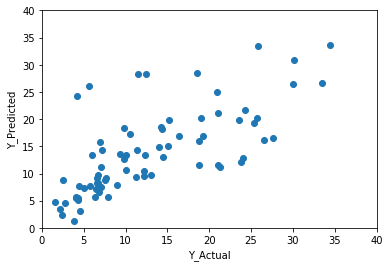

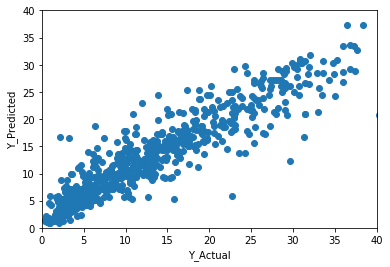

In [7]:
def main_func():
#     basepath = 'C:\\Users\\soi\\Documents\\MTECH-PROJ-Phase-2\\'
#     basepath = 'C:\\Users\\rukmangadan\\Documents\\MTECH-PROJ-Phase-2\\'
    basepath = 'C:\\Users\\theorist\\Documents\\MTECH-PROJ-Phase-2\\'
    in_file = basepath + 'd_soil_moisture_comparison_data.xlsx'
    SM_ML_df = load_data(in_file)
    SM_ML_df = replace_df_with_crop_classes_andMaptoInt(basepath, SM_ML_df)
    X_train, X_test, y_train, y_test = make_data_ready(SM_ML_df)
    clf, score = bagging(X_train, X_test, y_train, y_test)
    print(score)
    plot_y_vs_y_predicted(clf, X_test, y_test)
    plot_y_vs_y_predicted(clf, X_train, y_train)

# The Main Function
main_func()